<a href="https://colab.research.google.com/github/bishan5/A-Predictive-Traffic-Flow-Modelling-for-ITS/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Necessary Libraries**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro

# Google Colab specific
from google.colab import files
from google.colab import drive


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.9 MB/s eta 0:00:00


**Step 2: Load Data**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FILE_PATH = '/content/drive/MyDrive/Clean_Metro_Interstate_Traffic_Volume.csv'
data = pd.read_csv(FILE_PATH)

In [ ]:
data

,Timestamp,Traffic_volume,Holiday,Temp,Rain_1h,Snow_1h,Clouds_all,Weather_main,weather_description
0,01/07/2015 00:00,737,NaN,289.20,0.0,0.0,1.0,Clear,sky is clear
1,01/07/2015 01:00,444,NaN,289.40,0.0,0.0,1.0,Clear,sky is clear
2,01/07/2015 02:00,347,NaN,289.19,0.0,0.0,1.0,Clear,sky is clear
3,01/07/2015 03:00,356,NaN,288.74,0.3,0.0,1.0,Rain,light rain
4,01/07/2015 04:00,936,NaN,288.07,0.0,0.0,1.0,Clear,sky is clear
...,...,...,...,...,...,...,...,...,...
28507,30/09/2018 19:00,3543,NaN,283.45,0.0,0.0,75.0,Clouds,broken clouds
28508,30/09/2018 20:00,2781,NaN,282.76,0.0,0.0,90.0,Clouds,overcast clouds
28509,30/09/2018 21:00,2159,NaN,282.73,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm
28510,30/09/2018 22:00,1450,NaN,282.09,0.0,0.0,90.0,Clouds,overcast clouds


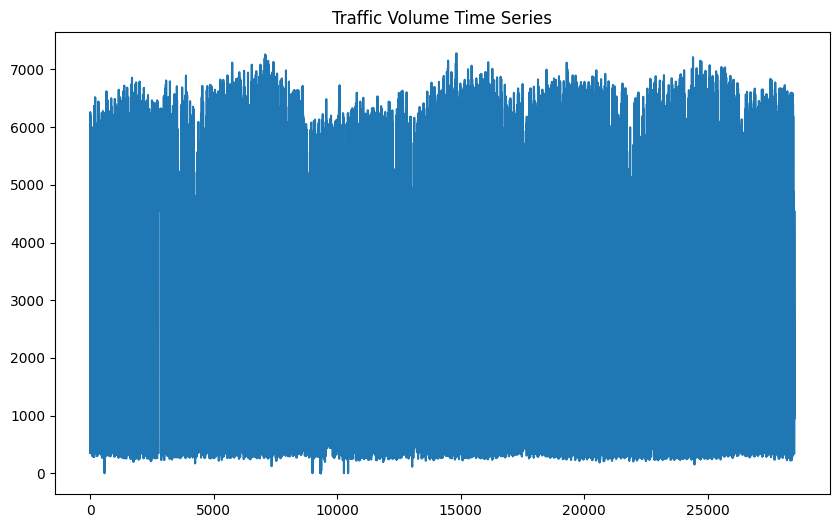

In [ ]:
# Plot the data
data['Traffic_volume'].plot(title='Traffic Volume Time Series', figsize=(10, 6))
plt.show()

**Step 3: Check Stationarity**

In [ ]:
# Check stationarity using the ADF test
adf_result = adfuller(data['Traffic_volume'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"{key}: {value}")

if adf_result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# Apply differencing if necessary
if adf_result[1] > 0.05:
    print("\nApplying differencing...")
    data['Traffic_volume_diff'] = data['Traffic_volume'].diff().dropna()
    diff_adf_result = adfuller(data['Traffic_volume_diff'])
    print(f"Differenced Series ADF Statistic: {diff_adf_result[0]}")
    print(f"Differenced Series p-value: {diff_adf_result[1]}")
    print("Critical Values for Differenced Series:")
    for key, value in diff_adf_result[4].items():
        print(f"{key}: {value}")

    if diff_adf_result[1] <= 0.05:
        print("The differenced series is stationary.")
    else:
        print("The differenced series is still not stationary. Further differencing or transformations may be required.")

ADF Statistic: -22.140804740434895
p-value: 0.0
Critical Values:
1%: -3.4305797842622394
5%: -2.8616415582310677
10%: -2.566824056382294
The series is stationary.


**Step 4: Plot ACF and PACF**

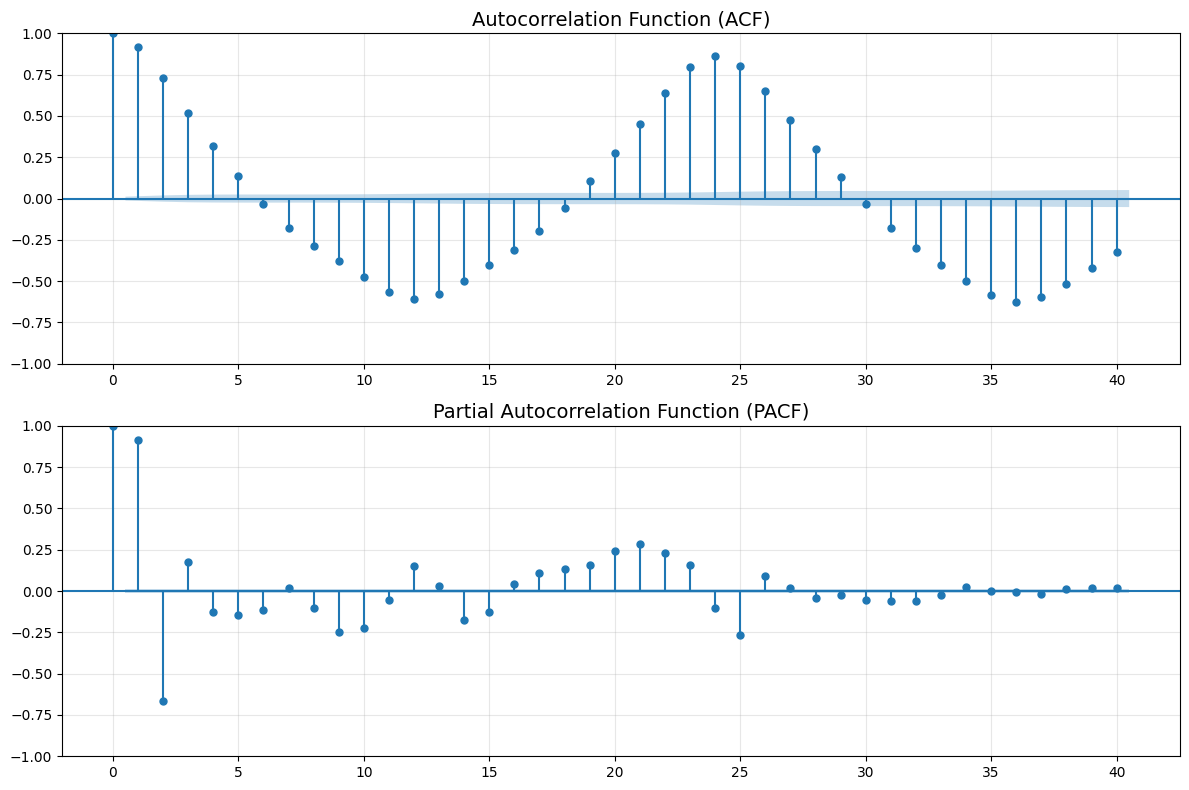

In [ ]:
# Plot ACF and PACF with custom blue confidence intervals
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF Plot
acf_plot = plot_acf(data['Traffic_volume'].dropna(), lags=40, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=14)
axes[0].grid(alpha=0.3)

# PACF Plot
pacf_plot = plot_pacf(data['Traffic_volume'].dropna(), lags=40, ax=axes[1], alpha=0.05)
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
axes[1].grid(alpha=0.3)

# Manually adjust confidence intervals color
for ax in axes:
    for patch in ax.patches:
        patch.set_facecolor('deepskyblue')
plt.tight_layout()
plt.show()

**Step 5: Fit ARIMA Model**

In [ ]:
# Fit ARIMA Model
model = ARIMA(data['Traffic_volume'], order=(4, 0, 1))
arima_result = model.fit()

# Summarize the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:         Traffic_volume   No. Observations:                28512
Model:                 ARIMA(4, 0, 1)   Log Likelihood             -220847.316
Date:                Tue, 11 Feb 2025   AIC                         441708.631
Time:                        22:31:15   BIC                         441766.438
Sample:                             0   HQIC                        441727.224
                              - 28512                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3314.8079     14.596    227.106      0.000    3286.201    3343.415
ar.L1          2.4206      0.010    254.089      0.000       2.402       2.439
ar.L2         -2.3231      0.017   -136.184      0.0

**Step 6: Forecast and Visualize**

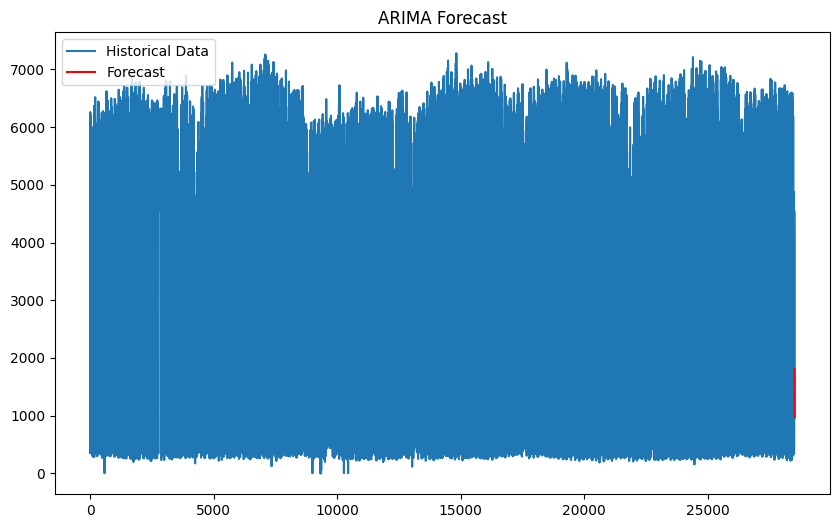

In [ ]:
# Forecast and plot
forecast = arima_result.forecast(steps=3)
plt.figure(figsize=(10, 6))
plt.plot(data['Traffic_volume'], label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

**Step 7: Residual Analysis**

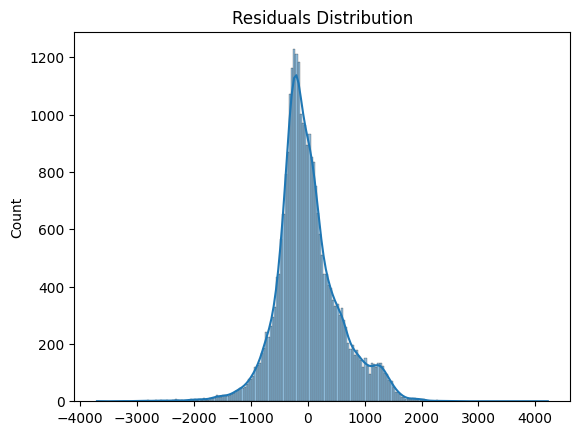

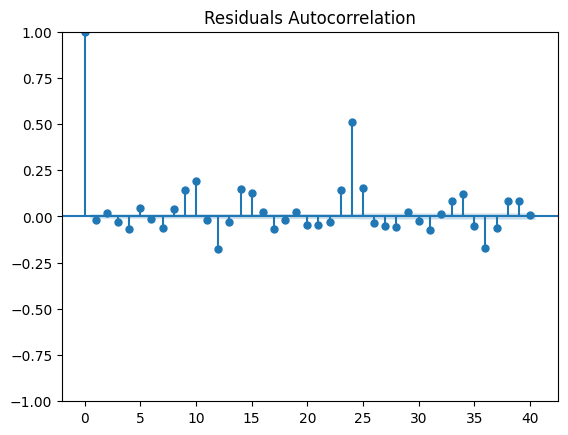

Shapiro-Wilk Test: Statistic=0.9610482821529844, p-value=4.900632137250024e-64


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 28512.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Analyze residuals
residuals = arima_result.resid

# Plot residuals distribution
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Check residual autocorrelation
plot_acf(residuals, lags=40)
plt.title('Residuals Autocorrelation')
plt.show()

# Perform Shapiro-Wilk normality test
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p}")


**Step 9: Evaluate 1-Hour, 2-Hour and 3-Hour Forecasts**

In [ ]:
# Evaluate forecasts for 1 to 3 hours
for i in range(1, 4):
    residuals_hr = data['Traffic_volume'].iloc[-i:].values - forecast.iloc[:i].values
    mae_hr = np.mean(np.abs(residuals_hr))
    mse_hr = np.mean(residuals_hr**2)
    rmse_hr = np.sqrt(mse_hr)
    r_squared_hr = 1 - (np.sum(residuals_hr**2) / np.sum((data['Traffic_volume'].iloc[-i:].values - data['Traffic_volume'].mean())**2))

    print(f"\nModel Evaluation Metrics for {i} Hour(s):")
    print(f"MAE: {mae_hr}")
    print(f"MSE: {mse_hr}")
    print(f"RMSE: {rmse_hr}")
    print(f"R-squared: {r_squared_hr}")


Model Evaluation Metrics for 1 Hour(s):
MAE: 27.918053023684024
MSE: 779.4176846332326
RMSE: 27.918053023684024
R-squared: 0.9998601545603101

Model Evaluation Metrics for 2 Hour(s):
MAE: 429.912533305298
MSE: 186281.69043296826
RMSE: 431.6036265289812
R-squared: 0.9588370388546161

Model Evaluation Metrics for 3 Hour(s):
MAE: 710.0748767783513
MSE: 705666.1711747494
RMSE: 840.0393866806183
R-squared: 0.7961844138025088


In [ ]:
# Ensure 'Timestamp' is a datetime column and set as the index
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
data.set_index('Timestamp', inplace=True)

Latest available date: 2018-09-30
Enter date (YYYY-MM-DD): 2018-09-27


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


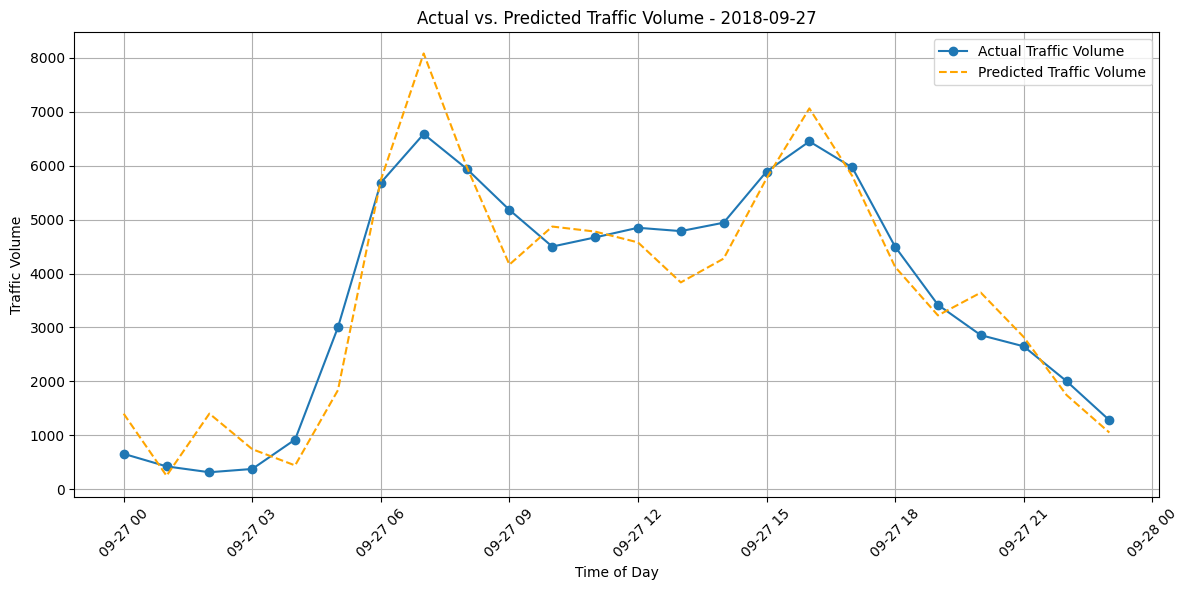

In [ ]:
# Select a date for analysis
latest_date = data.index.max().date()
print(f"Latest available date: {latest_date}")
selected_date = input("Enter date (YYYY-MM-DD): ")

try:
    selected_date = pd.to_datetime(selected_date).date()
    filtered_data = data[data.index.date == selected_date]
    if not filtered_data.empty:
        actual_traffic = filtered_data['Traffic_volume'].values
        fitted_model = ARIMA(actual_traffic[:-1], order=(4, 0, 2)).fit()
        predicted_traffic = []

        for i in range(len(actual_traffic)):
            forecast = fitted_model.forecast(steps=1)[0]
            predicted_traffic.append(forecast)
            if i < len(actual_traffic) - 1:
                fitted_model = fitted_model.append([actual_traffic[i]])

        plt.figure(figsize=(12, 6))
        plt.plot(filtered_data.index, actual_traffic, label='Actual Traffic Volume', marker='o')
        plt.plot(filtered_data.index, predicted_traffic, label='Predicted Traffic Volume', linestyle='dashed', color='orange')
        plt.xlabel('Time of Day')
        plt.ylabel('Traffic Volume')
        plt.title(f'Actual vs. Predicted Traffic Volume - {selected_date}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for {selected_date}.")
except ValueError:
    print("Invalid date format. Use YYYY-MM-DD.")